# **Diabetes Analysis**

This notebook focuses on analyzing a dataset related to diabetes. It performs various data exploration and visualization tasks to understand the patterns and relationships within the dataset. Additionally, it builds a prediction model using logistic regression to classify patients based on their medical characteristics and predict whether they have diabetes or not.

# **Package installation and Drive connection:**

In [ ]:
#numeric
import numpy as np

#processing
import pandas as pd

#graphics
import matplotlib.pyplot as plt

In [ ]:
#drive connection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **We load the file**

In [ ]:
%cd '/content/drive/My Drive/db'

/content/drive/My Drive/db


In [ ]:
#read the file
diabetes_df = pd.read_csv("diabetes.csv")

#Show data
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# See the data type

In [ ]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Verify that there is no missing data

In [ ]:
print("original number of datapoints\n", diabetes_df.shape)

diabates_df = diabetes_df.dropna()

print("number of datapoints\n", diabetes_df.shape)

original number of datapoints
 (768, 9)
number of datapoints
 (768, 9)


# **Identify patterns in the data**

We do a histogram to count how many people have diabetes and how many do not have diabetes.

For this we use the "Outcome" column.

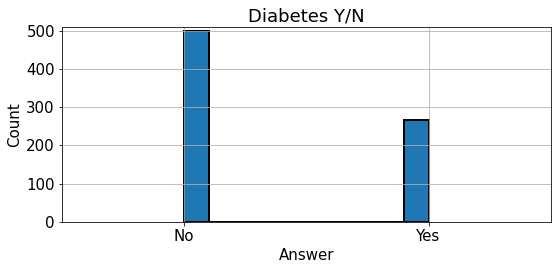

In [ ]:
#create a figure
figure = plt.figure(figsize=(8,4))

#create a subplot, it is just a figure so we use (1,1,1)
ax = figure.add_subplot(1,1,1)

#Create the histogram with our data
diabates_df["Outcome"].hist(ax=ax, edgecolor="black", linewidth=2)

#set the limits of the x-axis
ax.set_xlim(-0.5,1.5)

#set the tick frequency, we have 0 and 1 that correspond to Yes and No respectively
ax.set_xticks([0,1])

#labels of xticks
ax.set_xticklabels(["No","Yes"])

#create title
ax.set_title("Diabetes Y/N")

#set the labels of x-axis
ax.set_xlabel("Answer")

#set the labels of y-axis
ax.set_ylabel("Count")

#set the upper and lower limit of the y-axis
ax.set_ylim(0,510)

figure.tight_layout()

We can see that we have more people without diabetes.

Now let's look at the age range of the people we are working with.

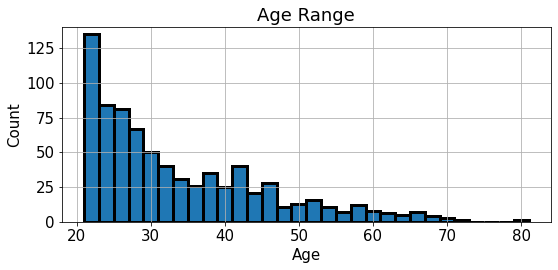

In [ ]:
#create a figure
figure = plt.figure(figsize=(8,4))

#create a subplot, it is just a figure so we use (1,1,1)
ax = figure.add_subplot(1,1,1)

#Create the histogram with our data
diabates_df["Age"].hist(ax=ax, bins=30, edgecolor="black", linewidth=3)

#create title
ax.set_title("Age Range")

#set the labels of x-axis
ax.set_xlabel("Age")

#set the labels of y-axis
ax.set_ylabel("Count")

#set the upper and lower limit of the y-axis
ax.set_ylim(0,140)

figure.tight_layout()

Most patients are between 20 and 40 years old.

We can change the number of bins as it suits us.

# Now we use a scatterplot

We use scatterplot to explore the relationship between our features in the data.

Let's create a graph relating BloodPressure and Age.

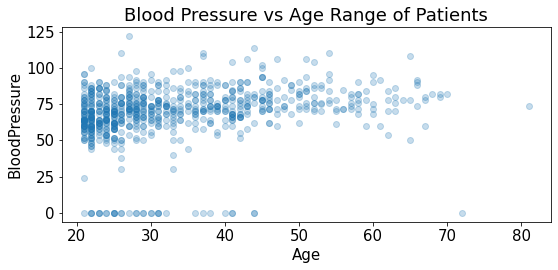

In [ ]:
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(diabetes_df['Age'], diabetes_df['BloodPressure'], alpha=0.25)
ax.set_xlabel("Age")
ax.set_ylabel("BloodPressure")
ax.set_title("Blood Pressure vs Age Range of Patients")
f.tight_layout()

We see that are many patients whit blood pressue 0, this is illogical, they were dead. Most likely were errors in collecting the data, let's remove them from the dataset.

In [ ]:
diabetes_df = diabetes_df[diabetes_df['BloodPressure'] > 0]
diabetes_df.shape

(733, 9)

And make the graph again

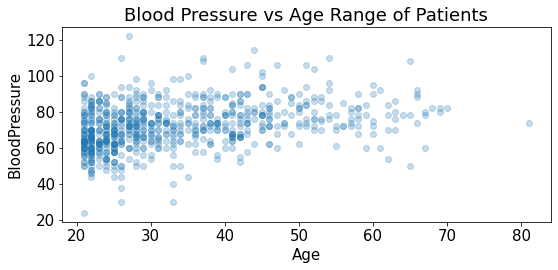

In [ ]:
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(diabetes_df['Age'], diabetes_df['BloodPressure'], alpha=0.25)
ax.set_xlabel("Age")
ax.set_ylabel("BloodPressure")
ax.set_title("Blood Pressure vs Age Range of Patients")
f.tight_layout()



*   Older patients have high blood pressure.
*   Youngs patients are more dispersed.



We do the same but now considering non-diabetic people and diabetic people.

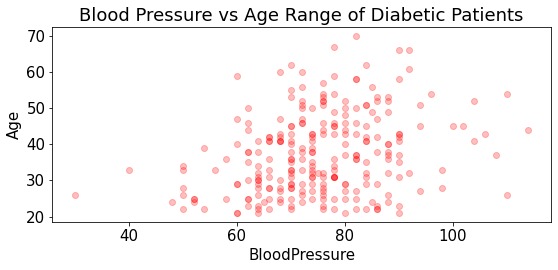

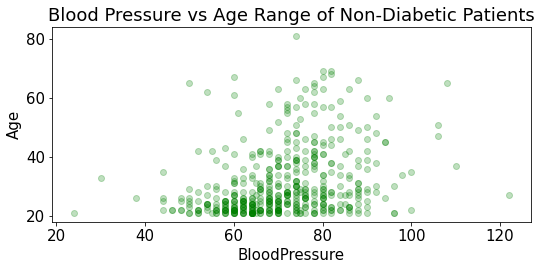

In [ ]:
diabetic = diabetes_df[diabetes_df['Outcome'] == 1]
non_diabetic = diabetes_df[diabetes_df['Outcome'] == 0]

#Diabetic
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(diabetic['BloodPressure'], diabetic['Age'], alpha=0.25, color='red')
ax.set_xlabel("BloodPressure")
ax.set_ylabel("Age")
ax.set_title("Blood Pressure vs Age Range of Diabetic Patients")
f.tight_layout()

#Not diabetic
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(non_diabetic['BloodPressure'], non_diabetic['Age'], alpha=0.25, color='green')
ax.set_xlabel("BloodPressure")
ax.set_ylabel("Age")
ax.set_title("Blood Pressure vs Age Range of Non-Diabetic Patients")
f.tight_layout()

The diabetic patients are more dispersed whit more people with high blood pressure compared to non-diabetic patients.

# **Create a prediction model**

We use the sklearn library for create a pediction model with logistic regression to be able to classify patients (according to their medical characteristics and know if they have diabetes or not.

We load the sklearn library

In [ ]:
#To the confusion metrics
from sklearn import metrics

#To divide our data train/test
from sklearn.model_selection import train_test_split

#The model
from sklearn.linear_model import LogisticRegression

#To the visualization
import matplotlib.pyplot as plt
import seaborn as sns

Define *x* (features) and *y* (target):

In [ ]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
x = diabetes_df[feature_cols]
y = diabetes_df.Outcome

we divide our data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

We use the method:

In [ ]:
# We name the method
logreg = LogisticRegression()

# We train
logreg.fit(X_train, y_train)

# We predict
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Show the predictions:

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

# **Evaluation**

First we will use the confusion matrix to evaluate the predictions

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

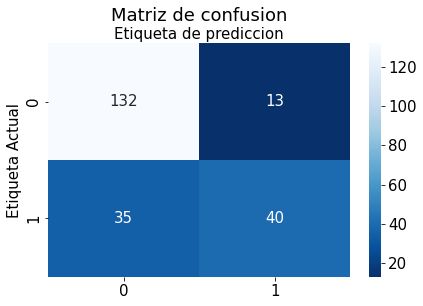

In [ ]:
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

Now we use the accuracy method:

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7818181818181819
